In [1]:
%pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 2.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-3.0.1-py3-none-any.whl.metadata (10.0 kB)
Using cached pybind11-3.0.1-py3-none-any.whl (293 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp312-cp312-linux_x86_64.whl size=4498209 sha256=291d57c4d30cd859da5e838ad2e5d92c966ba4ec748926af49ca5f166b7c9368
  Stored in directory: /root/.cache/pip/wheels/20/27/95/a7baf1b435f1cbde017cabdf1e9688526d2b0e929255a359c6
Successfully built fasttext


In [2]:
import pandas as pd
import fasttext
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
# Baca dataset
df = pd.read_csv("/content/dataset_laptop_preprocessed_v2.csv")

In [4]:
# Baca dataset
df2 = pd.read_csv("/content/dataset_laptop_preprocessed_v2.csv")

In [5]:
# Format FastText: __label__<label> <text>
df['fasttext_format'] = '__label__' + df['label_rekomendasi'] + ' ' + df['preprocessed']

In [6]:
# Format FastText: __label__<label> <text>
df2['fasttext_format'] = '__label__' + df2['label_rekomendasi'] + ' ' + df2['preprocessed']

In [7]:
# Simpan ke file txt
df['fasttext_format'].to_csv("fasttext_train.txt", index=False, header=False)

In [8]:
# Simpan ke file txt
df2['fasttext_format'].to_csv("fasttext_train_v2.txt", index=False, header=False)

In [9]:
# Latih model dalam mode supervised
model = fasttext.train_supervised(input="fasttext_train.txt", epoch=25, lr=1.0, wordNgrams=3, dim=100)

In [10]:
# Latih model dalam mode supervised
model2 = fasttext.train_supervised(input="fasttext_train_v2.txt", epoch=25, lr=1.0, wordNgrams=3, dim=100)

In [11]:
# Simpan model
model.save_model("fasttext_model.bin")

In [12]:
# Simpan model
model2.save_model("fasttext_model_v2.bin")

In [13]:
# testing model FastText
vector = model.get_sentence_vector("butuh laptop ringan untuk desain dan kuliah")
print(vector)  # Ini adalah array numpy 1x100 (default dim=100)

[-3.86417116e-04  2.24666223e-02 -1.42240543e-02  3.87560576e-02
  2.66123377e-02  7.14946538e-02 -3.65763274e-03  8.62843730e-03
  8.77042487e-03  1.44437524e-02 -5.84926549e-03 -4.91465256e-03
 -1.75960511e-02 -1.80028751e-02  5.47732227e-02 -3.20459045e-02
  1.10570574e-02 -2.83810720e-02 -2.86529918e-04  9.89499822e-05
  1.10425483e-02 -1.25418659e-02  6.97525265e-03  6.86343480e-03
  1.24834292e-02  8.19164794e-03  1.33201890e-02 -4.51385975e-03
 -2.65122652e-02  1.29447486e-02  4.49933074e-02  2.19242685e-02
 -6.96674129e-03 -1.65441576e-02 -5.16789481e-02 -3.53723229e-03
 -5.85152991e-02  3.14358361e-02  4.43539731e-02  4.73015346e-02
 -6.78039482e-03 -4.17221850e-03  3.08115855e-02  5.21117933e-02
 -1.10794529e-02  2.80970018e-02 -1.87381804e-02  1.86397359e-02
  2.09349450e-02  2.38882788e-02  1.24832867e-02  1.20943331e-03
  1.41233942e-02  4.96677589e-03  3.12038939e-02  1.31017407e-02
 -5.03540551e-03 -3.55501054e-03 -4.41509001e-02 -3.57779511e-03
  1.29720103e-02 -2.13001

In [14]:
# Testing model FastText
vector2 = model2.get_sentence_vector("butuh laptop coding multitasking")
print(vector2)  # Ini adalah array numpy 1x100 (default dim=100)

[-0.05731352  0.039658   -0.01965216 -0.08443071 -0.0286661  -0.11008602
 -0.03688904 -0.04630731  0.03715659 -0.00077998 -0.02721881  0.02838012
  0.04083293  0.08562727 -0.06768899  0.00903545 -0.02044738  0.08027999
 -0.04669493  0.04757808  0.00812238  0.06527499 -0.00942176 -0.02279728
 -0.04090808 -0.08144031  0.00462728  0.0226317   0.02176519  0.00386226
 -0.05067983 -0.09980263  0.03271256 -0.04144583  0.03188831  0.02005916
  0.09432315 -0.13491511 -0.06336084 -0.13627674  0.01281423  0.00567822
 -0.01830703 -0.08812013  0.03743879 -0.04473972  0.09283005  0.01393629
 -0.03341638 -0.05254906 -0.0136771   0.07207758  0.06588356 -0.02494602
 -0.07710546 -0.04453932 -0.01158797 -0.00518528  0.16219984 -0.06006743
 -0.01506358  0.01270001 -0.03311906  0.03243171 -0.00898772  0.00419582
 -0.03429525 -0.00564876 -0.06120561  0.03250706  0.01068246  0.0795532
 -0.02194699 -0.12514687  0.04931273  0.00168047  0.04882612  0.02029135
 -0.13290654  0.0976903   0.02013529  0.02499093  0.

In [15]:
# Load model yang sudah di-train
model = fasttext.load_model('/content/fasttext_model.bin')

In [16]:
# Load model yang sudah di-train
model2 = fasttext.load_model('/content/fasttext_model_v2.bin')

In [17]:
# Uji representasi vektor dari kata
vector = model.get_word_vector("laptop")
print(vector)

[-0.217232    0.46433944 -0.17488901 -0.12142991  0.19677049  0.2346577
 -0.31712517 -0.05459323  0.22688694  0.23072663 -0.18570086  0.08242372
 -0.00594258  0.14763197  0.09356425 -0.41685492  0.06975665  0.11405812
 -0.10714421 -0.1251497   0.05542472  0.13262708  0.04985008  0.08666427
 -0.20122644 -0.3367499   0.02836174  0.07280165 -0.29415613  0.02267437
  0.09605243 -0.04743386 -0.00767922 -0.30186513 -0.41111517 -0.07893307
 -0.28144372 -0.21892807  0.05531744 -0.1030241  -0.0136017   0.1894741
  0.00892674  0.07394935  0.1498598   0.2191909   0.16310205  0.08309436
  0.1381852   0.05828795 -0.07522696  0.24453957  0.2433805   0.00433145
 -0.08195847 -0.16541038 -0.0770541  -0.03601018  0.28072223 -0.23455244
 -0.02601781 -0.05284416  0.47187728 -0.15585063  0.10284915  0.0556139
 -0.15563844 -0.11368731 -0.03518789 -0.18623492  0.04976203  0.12165201
  0.19278935 -0.06529424  0.10383194  0.1612966   0.10473092  0.03048095
  0.10578271 -0.03372123 -0.12063417 -0.05045636  0.23

In [18]:
# Uji representasi vektor dari kata
vector2 = model2.get_word_vector("laptop")
print(vector2)

[-0.217232    0.46433944 -0.17488901 -0.12142991  0.19677049  0.2346577
 -0.31712517 -0.05459323  0.22688694  0.23072663 -0.18570086  0.08242372
 -0.00594258  0.14763197  0.09356425 -0.41685492  0.06975665  0.11405812
 -0.10714421 -0.1251497   0.05542472  0.13262708  0.04985008  0.08666427
 -0.20122644 -0.3367499   0.02836174  0.07280165 -0.29415613  0.02267437
  0.09605243 -0.04743386 -0.00767922 -0.30186513 -0.41111517 -0.07893307
 -0.28144372 -0.21892807  0.05531744 -0.1030241  -0.0136017   0.1894741
  0.00892674  0.07394935  0.1498598   0.2191909   0.16310205  0.08309436
  0.1381852   0.05828795 -0.07522696  0.24453957  0.2433805   0.00433145
 -0.08195847 -0.16541038 -0.0770541  -0.03601018  0.28072223 -0.23455244
 -0.02601781 -0.05284416  0.47187728 -0.15585063  0.10284915  0.0556139
 -0.15563844 -0.11368731 -0.03518789 -0.18623492  0.04976203  0.12165201
  0.19278935 -0.06529424  0.10383194  0.1612966   0.10473092  0.03048095
  0.10578271 -0.03372123 -0.12063417 -0.05045636  0.23

In [19]:
# Mengecek kata-kata yang mirip
print(model.get_nearest_neighbors("desain"))

[(0.9840484261512756, 'editing'), (0.9805096387863159, 'arsitektur'), (0.9700212478637695, 'adobe'), (0.968514621257782, 'premiere'), (0.9668697118759155, 'pro'), (0.9641686677932739, 'illustrator'), (0.9641551375389099, 'photoshop'), (0.9556819200515747, 'rendering'), (0.954495370388031, 'lebar'), (0.9493295550346375, 'penyimpanan')]


In [20]:
# Mengecek kata-kata yang mirip
print(model2.get_nearest_neighbors("ngoding"))

[(0.9864670634269714, 'vs'), (0.9861626029014587, 'ide'), (0.9861624240875244, 'code'), (0.9830840826034546, 'compile'), (0.9811729192733765, 'kebutuhan'), (0.9801592230796814, 'virtual'), (0.9732384085655212, 'dipakai'), (0.9729533195495605, 'makan'), (0.9722505807876587, 'tools'), (0.9721245765686035, 'aplikasi')]


In [21]:
# Ubah text menjadi vektor menggunakan FastText
def text_to_vector(text):
    return model.get_sentence_vector(text)

X = np.array([text_to_vector(text) for text in df['preprocessed']])
y = df['label_rekomendasi']

In [22]:
# Ubah text menjadi vektor menggunakan FastText
def text_to_vector(text):
    return model2.get_sentence_vector(text)

I = np.array([text_to_vector(text) for text in df2['preprocessed']])
J = df2['label_rekomendasi']

In [23]:
# Split data train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
#X_train, y_train = X, y
#X_test, y_test = X, y

In [24]:
# Split data train dan test
I_train, I_test, J_train, J_test = train_test_split(I, J, test_size=0.4, random_state=42)

In [65]:
# Training Random Forest
rf_classifier = RandomForestClassifier(n_estimators=400, bootstrap=False, random_state=42, max_features=80, max_leaf_nodes=67, max_depth=50, min_samples_split=30, min_samples_leaf=10 )
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=50, max_features=80,
                       max_leaf_nodes=67, min_samples_leaf=10,
                       min_samples_split=30, n_estimators=400, random_state=42)

In [26]:
# 1️⃣ Definisikan model dasar Random Forest
rf_classifier2 = RandomForestClassifier(random_state=42)

In [27]:
# 2️⃣ Tentukan parameter yang ingin dioptimasi
param_grid = {
    'n_estimators': [100, 200, 300],        # jumlah pohon dalam hutan
    'max_depth': [None, 10, 20, 30],        # kedalaman maksimum tiap pohon
    'min_samples_split': [2, 5, 10],        # minimal sampel untuk membagi node
    'min_samples_leaf': [1, 2, 4],          # minimal sampel pada daun pohon
    'max_features': ['sqrt', 'log2']        # jumlah fitur untuk tiap split
}

In [28]:
# 3️⃣ Lakukan pencarian parameter terbaik menggunakan GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_classifier2,
    param_grid=param_grid,
    cv=5,                # 5-fold cross-validation
    scoring='accuracy',  # metrik evaluasi
    n_jobs=-1,           # gunakan semua core CPU
    verbose=2
)

In [29]:
# 4️⃣ Jalankan GridSearchCV untuk menemukan kombinasi parameter terbaik
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [30]:
# 5️⃣ Tampilkan hasil parameter terbaik
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Accuracy: 1.0


In [31]:
# 6️⃣ Gunakan parameter terbaik untuk melatih model final
best_rf = grid_search.best_estimator_

In [66]:
# Prediksi dan evaluasi
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy}")
print(classification_report(y_test, y_pred))

Akurasi: 0.7580645161290323
              precision    recall  f1-score   support

      gaming       0.46      0.92      0.62        13
  multimedia       0.90      1.00      0.95         9
      office       1.00      1.00      1.00        13
 programming       0.00      0.00      0.00        14
 workstation       1.00      1.00      1.00        13

    accuracy                           0.76        62
   macro avg       0.67      0.78      0.71        62
weighted avg       0.65      0.76      0.69        62



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [33]:
# Prediksi dan evaluasi
J_pred = best_rf.predict(I_test)
accuracy = accuracy_score(J_test, J_pred)
print(f"Akurasi: {accuracy}")
print(classification_report(J_test, J_pred))

Akurasi: 0.967741935483871
              precision    recall  f1-score   support

      gaming       0.87      1.00      0.93        13
  multimedia       1.00      0.89      0.94         9
      office       1.00      1.00      1.00        13
 programming       1.00      0.93      0.96        14
 workstation       1.00      1.00      1.00        13

    accuracy                           0.97        62
   macro avg       0.97      0.96      0.97        62
weighted avg       0.97      0.97      0.97        62



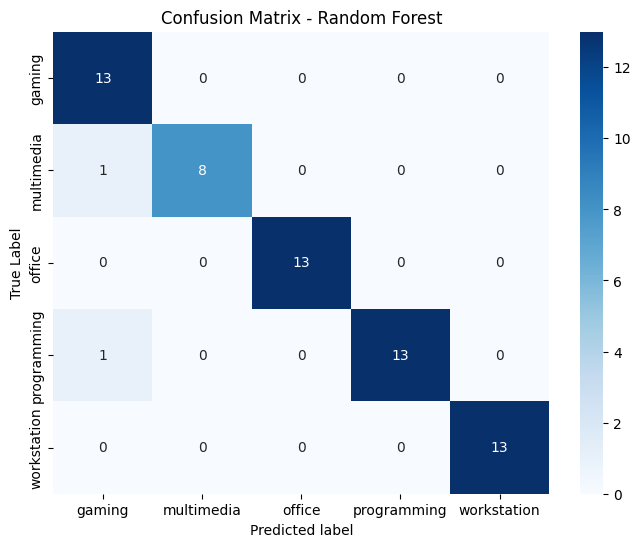

In [34]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=rf_classifier.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest')
plt.show()

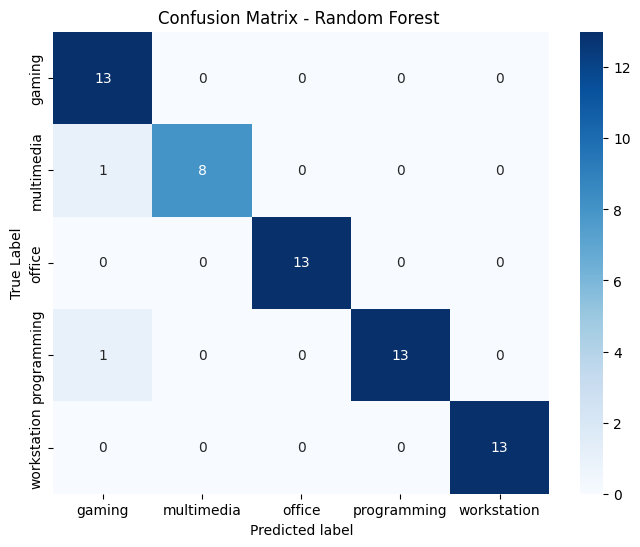

In [36]:
# Confusion Matrix
cm2 = confusion_matrix(J_test, J_pred, labels=best_rf.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', xticklabels=best_rf.classes_, yticklabels=best_rf.classes_)
plt.xlabel('Predicted label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest ')
plt.show()

In [37]:
# Menggunakan 5-Fold Cross Validation
cv_scores = cross_val_score(rf_classifier, X, y, cv=5, scoring='accuracy')

print("Hasil Cross_validation (5-Fold)")
for i, score in enumerate(cv_scores, start=1):
    print(f"Fold {i}: {score:.4f}")

print(f"\nRata-rata Akurasi: {np.mean(cv_scores):.4f}")
print(f"Standar Deviasi: {np.std(cv_scores):.4f}")

print(f"Cross Validation Scores: {cv_scores}")
print(f"Mean CV Score: {np.mean(cv_scores)}")

Hasil Cross_validation (5-Fold)
Fold 1: 0.9677
Fold 2: 0.9677
Fold 3: 1.0000
Fold 4: 0.9677
Fold 5: 1.0000

Rata-rata Akurasi: 0.9806
Standar Deviasi: 0.0158
Cross Validation Scores: [0.96774194 0.96774194 1.         0.96774194 1.        ]
Mean CV Score: 0.9806451612903226


In [38]:
# Menggunakan 5-Fold Cross Validation
cv_scores2 = cross_val_score(best_rf, I, J, cv=5, scoring='accuracy')

print("Hasil Cross_validation (5-Fold)")
for i, score in enumerate(cv_scores2, start=1):
    print(f"Fold {i}: {score:.4f}")

print(f"\nRata-rata Akurasi: {np.mean(cv_scores2):.4f}")
print(f"Standar Deviasi: {np.std(cv_scores2):.4f}")

print(f"Cross Validation Scores: {cv_scores2}")
print(f"Mean CV Score: {np.mean(cv_scores2)}")

Hasil Cross_validation (5-Fold)
Fold 1: 0.9677
Fold 2: 0.9677
Fold 3: 1.0000
Fold 4: 0.9677
Fold 5: 1.0000

Rata-rata Akurasi: 0.9806
Standar Deviasi: 0.0158
Cross Validation Scores: [0.96774194 0.96774194 1.         0.96774194 1.        ]
Mean CV Score: 0.9806451612903226


In [39]:
# ===================== VISUALISASI =========================

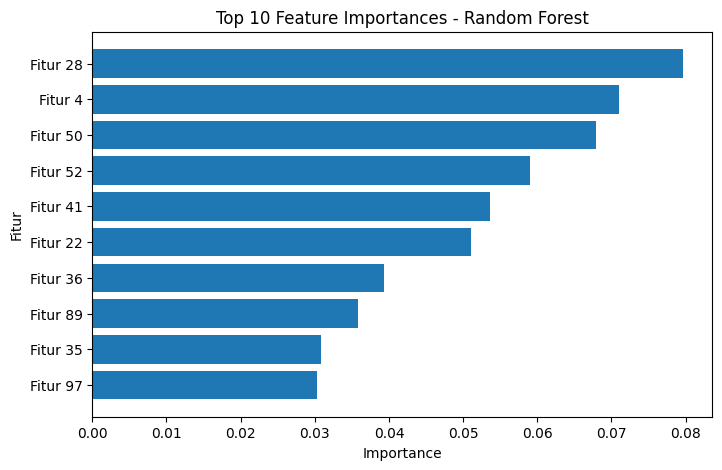

In [40]:
import pandas as pd

importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[-10:]  # top 10 fitur

plt.figure(figsize=(8,5))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [f'Fitur {i}' for i in indices])
plt.title('Top 10 Feature Importances - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Fitur')
plt.show()

In [41]:
import joblib

# Simpan model
joblib.dump(rf_classifier, 'random_forest_model.joblib')
print("Model Random Forest disimpan sebagai random_forest_model.pkl")

Model Random Forest disimpan sebagai random_forest_model.pkl


In [42]:
# Simpan model Random Forest 2
joblib.dump(best_rf, 'random_forest_model_v2.pkl')
print("Model Random Forest disimpan sebagai random_forest_model_v2.pkl")

Model Random Forest disimpan sebagai random_forest_model_v2.pkl


In [43]:
# Pengujian Langsung

import re

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text


def get_fasttext_vector(text, fasttext_model, dim=100):
    """
    Mengubah teks menjadi vektor FastText.
    """
    cleaned = preprocess_text(text)
    vector = fasttext_model.get_sentence_vector(cleaned)

    # Pastikan bentuknya sesuai dimensi
    return np.array(vector).reshape(1, dim)

def predict_category(text, fasttext_model, rf_model, dim=100):
    vec = get_fasttext_vector(text, fasttext_model, dim)
    pred = rf_classifier.predict(vec)[0]
    return pred


In [44]:
# Contoh deskripsi dari user
deskripsi = "saya butuh laptop untuk kerja kantoran dan nonton film"

hasil_prediksi = predict_category(deskripsi, model, rf_classifier, dim=100)

print("Deskripsi  :", deskripsi)
print("Prediksi Kategori:", hasil_prediksi)


Deskripsi  : saya butuh laptop untuk kerja kantoran dan nonton film
Prediksi Kategori: workstation


In [45]:
# --- Data hasil GridSearchCV ---
results = grid_search.cv_results_

# Ambil parameter & mean test score
df_results = pd.DataFrame({
    'n_estimators': results['param_n_estimators'].astype(int),
    'max_depth': results['param_max_depth'],
    'mean_test_score': results['mean_test_score']
})

In [46]:
# Mengubah None menjadi string agar bisa diproses
df_results['max_depth'] = df_results['max_depth'].astype(str)

In [59]:
# Pivot untuk heatmap
df_unique = df_results.drop_duplicates(subset=['max_depth', 'n_estimators'])
pivot_table = df_unique.pivot(
    index='max_depth',
    columns='n_estimators',
    values='mean_test_score'
)



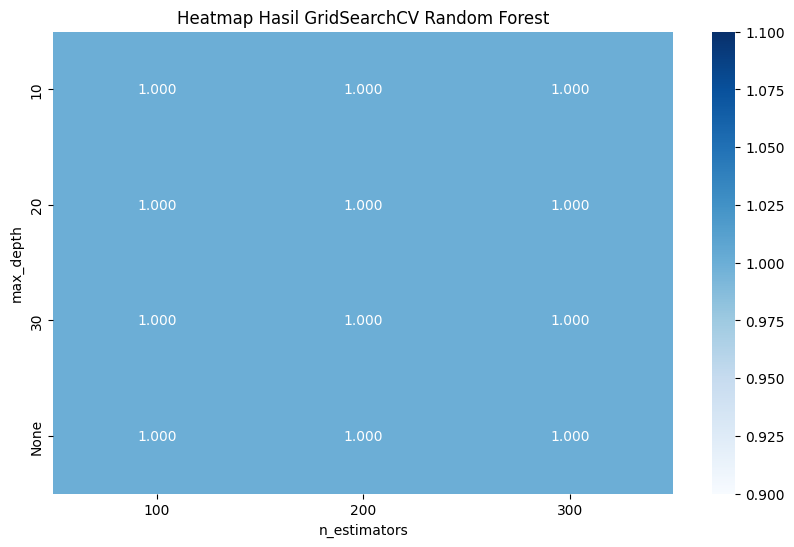

In [60]:
# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_table,
    annot=True,
    cmap="Blues",
    fmt=".3f"
)
plt.title("Heatmap Hasil GridSearchCV Random Forest")
plt.xlabel("n_estimators")
plt.ylabel("max_depth")
plt.show()

In [57]:
df_full = pd.DataFrame(grid_search.cv_results_)
df_full = df_full[['param_n_estimators', 'param_max_depth',
                   'param_min_samples_split', 'param_min_samples_leaf',
                   'param_max_features', 'mean_test_score', 'std_test_score']]

df_full

,param_n_estimators,param_max_depth,param_min_samples_split,param_min_samples_leaf,param_max_features,mean_test_score,std_test_score
0,100,None,2,1,sqrt,1.0,0.0
1,200,None,2,1,sqrt,1.0,0.0
2,300,None,2,1,sqrt,1.0,0.0
3,100,None,5,1,sqrt,1.0,0.0
4,200,None,5,1,sqrt,1.0,0.0
...,...,...,...,...,...,...,...
211,200,30,5,4,log2,1.0,0.0
212,300,30,5,4,log2,1.0,0.0
213,100,30,10,4,log2,1.0,0.0
214,200,30,10,4,log2,1.0,0.0
